<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-0">Отток клиентов</a></span></li><li><span><a href="#1.-Подготовка-данных" data-toc-modified-id="1.-Подготовка-данных-1">1. Подготовка данных</a></span></li><li><span><a href="#2.-Исследование-задачи" data-toc-modified-id="2.-Исследование-задачи-2">2. Исследование задачи</a></span></li><li><span><a href="#3.-Борьба-с-дисбалансом" data-toc-modified-id="3.-Борьба-с-дисбалансом-3">3. Борьба с дисбалансом</a></span></li><li><span><a href="#4.-Тестирование-модели" data-toc-modified-id="4.-Тестирование-модели-4">4. Тестирование модели</a></span></li><li><span><a href="#5.-Вывод" data-toc-modified-id="5.-Вывод-5">5. Вывод</a></span></li>

# Отток клиентов

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
pd.set_option('mode.chained_assignment', None)
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — количество недвижимости у клиента
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

Как видно в колонке `Tenure` пропущено около 10% значений, здесь есть 2 варианта, либо заполнить пропуски, либо оставить без изменения, но в такком случае предется удалить пропущенные значения. Проверим, если коррелиция между столбцом `Tenure` и ещё каким-то, чтобы можно было заполнить данные исходя из связи.

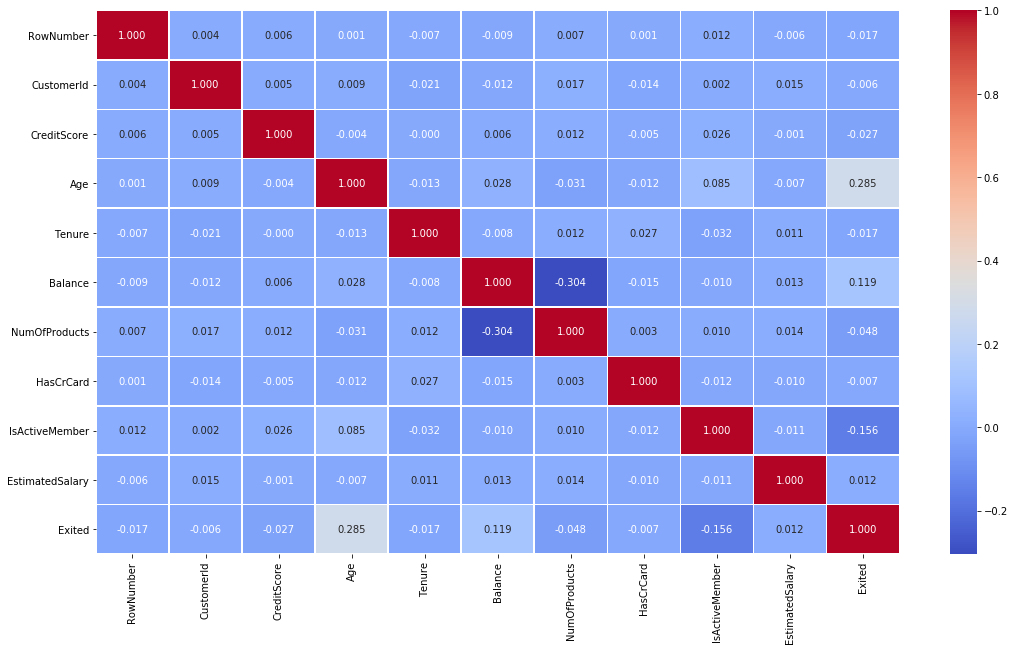

In [2]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, fmt=".3f", linewidths=.5, cmap= 'coolwarm')
#plt.title('', fontsize=15)
#plt.xlabel('', fontsize=15)
#plt.ylabel('', fontsize=15)
plt.show()

Как видно нет явной корреляции между данными, поэтому заполним медианной по столбцу.

In [4]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Удалим из таблицы столбцы `RowNumber, Surname, CustomerId`, так как они не несут полезности при обучении модели. `CustomerId` убрали, чтобы модель не была персонализирована.

In [5]:
data = data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Теперь в нашей таблицы только те столбцы, которые необходимы для обучения. Но к обучению переходить пока рано, необходимо подготовить категориальные данные. Преобразуем столбцы `Gender, Geography`.

In [6]:
data = pd.get_dummies(data, columns=['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,1,0,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,1,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,0,1,1,0


Категориальные данные "перекодированы", теперь можно переходить к обучению.

# 2. Исследование задачи

Разделим наши данные на 3 выборки: 
- train 60%
- valid 20%
- test  20%

In [7]:
data_train, data_valid = train_test_split(data, test_size=0.40, random_state=12)
data_valid, data_test = train_test_split(data_valid, test_size=0.50, random_state=12)
print('Тренировочная выборка:', data_train.shape)
print('Валидационная выборка:', data_valid.shape)
print('Тестовая выборка:', data_test.shape)

Тренировочная выборка: (6000, 13)
Валидационная выборка: (2000, 13)
Тестовая выборка: (2000, 13)


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

    
В целом выборка разделена верно. Здорово, что показываем итоговое разделение по данным, в том числе можно было подписать их текстом.
    
Я бы рекомендовал бы ещё использовать атрибут `stratify` для целевой переменной. Он дает нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.
    
</div>

Подготовим празнаки и целевой признак для каждой из трех выборок.

In [8]:
features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']

features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

Для исследования воспользуемся LogisticRegression, DecisionTreeClassifier и RandomForestClassifier и посмотрим, какая из моделей покажет себя лучше.

In [9]:
model_log = LogisticRegression(random_state=12, solver='liblinear')
model_log.fit(features_train, target_train)
predcited_log = model_log.predict(features_valid)
rock_auc_log = roc_auc_score(predcited_log, target_valid)

In [10]:
best_model_tree = None
best_result_tree = 0.8
best_depth_tree = 0
for depth in range (2, 20):
        model_tree = DecisionTreeClassifier(random_state=12, max_depth=depth)
        model_tree.fit(features_train, target_train)
        predcited_tree = model_tree.predict(features_valid)
        rock_auc_tree = roc_auc_score(predcited_tree, target_valid)
        if rock_auc_tree > best_result_tree:
            best_model_tree = model_tree
            best_result_tree = rock_auc_tree
            best_depth_tree = depth

In [11]:
best_model_forest = None
best_result_forest = 0.8
best_est_forest = 0
best_depth_forest = 0
for est in range(50, 100):
    for depth in range (2, 20):
        model_forest = RandomForestClassifier(random_state=12, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predcited_forest = model_forest.predict(features_valid)
        rock_auc_forest = roc_auc_score(predcited_forest, target_valid)
        if rock_auc_forest > best_result_forest:
            best_model_forest = model_forest
            best_result_forest = rock_auc_forest
            best_est_forest = est
            best_depth_forest = depth

In [12]:
print('')
print('ROC-AUC логистической регресии на валидационной выборке: {:.3f}'.format(rock_auc_log))

print('')
print('ROC-AUC наилучшей модели на валидационной выборке: {:.3f}'.format(best_result_tree))
print('Максимальная глубина:', best_depth_tree)

print('')
print('ROC-AUC наилучшей модели на валидационной выборке: {:.3f}'.format(best_result_forest))
print('Количество деревьев:', best_est_forest)
print('Максимальная глубина:', best_depth_forest)


ROC-AUC логистической регресии на валидационной выборке: 0.630

ROC-AUC наилучшей модели на валидационной выборке: 0.856
Максимальная глубина: 3

ROC-AUC наилучшей модели на валидационной выборке: 0.902
Количество деревьев: 63
Максимальная глубина: 2


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Интересно а почему считаешь именно `ROC–AUC`, а не метрику `F1` для сравнения наших моделей? 
</div>

RandomForestClassifier показал самый высокий результат, но на данном этапе мы не рассматривали дисбаланс, так что дальше нужно рассмотреть модели с его учетом.

# 3. Борьба с дисбалансом

Посмотрим на соотношение классов в данных.

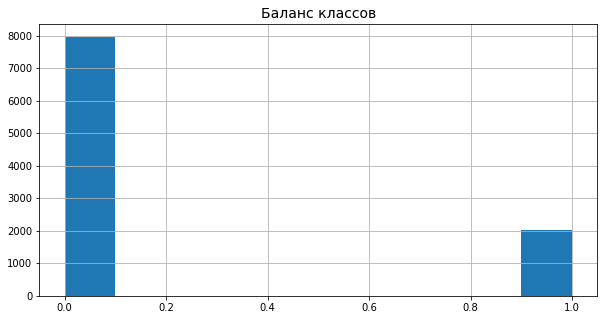

0    7963
1    2037
Name: Exited, dtype: int64

In [43]:
plt.figure(figsize=(10, 5))
plt.hist(data['Exited'])
plt.title('Баланс классов', size=14)
plt.grid(True)
plt.show()
data['Exited'].value_counts()

Как видно различие больше почти чем в 4 раза, необходимо это исправить.

Для борьбы с дисбалансом воспользуемся несколькими методами и посмотрим, какой себя покажет лучше.

- Взвешивание классов.

In [14]:
model_log = LogisticRegression(random_state=12, solver='liblinear', class_weight='balanced')
model_log.fit(features_train, target_train)
predcited_log = model_log.predict(features_valid)
f1_log = f1_score(target_valid, predcited_log)
print('')
print("F1 логистической регрессии: {:.3f}".format(f1_log))

model_tree = DecisionTreeClassifier(random_state=12, max_depth=19, class_weight='balanced')
model_tree.fit(features_train, target_train)
predcited_tree = model_tree.predict(features_valid)
f1_tree = f1_score(target_valid, predcited_tree)
print('')
print("F1 дерева решений: {:.3f}".format(f1_tree))

model_forest = RandomForestClassifier(random_state=12, n_estimators=58, max_depth=19, class_weight='balanced')
model_forest.fit(features_train, target_train)
predcited_forest = model_forest.predict(features_valid)
f1_forest = f1_score(predcited_forest, target_valid)
print('')
print("F1 случайного леса: {:.3f}".format(f1_forest))


F1 логистической регрессии: 0.479

F1 дерева решений: 0.516

F1 случайного леса: 0.574


- Изменение порога класификации.

In [15]:
model_log = LogisticRegression(random_state=12, solver='liblinear')
model_log.fit(features_train, target_train)
predcited_log = model_log.predict_proba(features_valid)
predcited_log_one = predcited_log[:, 1]
print('Логистическая регрессия')

for threshold in np.arange(0.15, 0.25, 0.01):
    predicted = predcited_log_one > threshold
    f1_log = f1_score(predicted, target_valid)
    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1_log))

Логистическая регрессия
Порог = 0.15 | F1 = 0.398
Порог = 0.16 | F1 = 0.400
Порог = 0.17 | F1 = 0.406
Порог = 0.18 | F1 = 0.411
Порог = 0.19 | F1 = 0.412
Порог = 0.20 | F1 = 0.407
Порог = 0.21 | F1 = 0.409
Порог = 0.22 | F1 = 0.416
Порог = 0.23 | F1 = 0.407
Порог = 0.24 | F1 = 0.400


In [16]:
model_tree = DecisionTreeClassifier(random_state=12, max_depth=19)
model_tree.fit(features_train, target_train)
predcited_tree = model_tree.predict_proba(features_valid)
predcited_tree_one = predcited_tree[:, 1]
print('Дерево решений')

for threshold in np.arange(0.3, 0.4, 0.01):
    predicted = predcited_tree_one > threshold
    f1_tree = f1_score(predicted, target_valid)
    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1_tree))

Дерево решений
Порог = 0.30 | F1 = 0.520
Порог = 0.31 | F1 = 0.520
Порог = 0.32 | F1 = 0.520
Порог = 0.33 | F1 = 0.520
Порог = 0.34 | F1 = 0.520
Порог = 0.35 | F1 = 0.520
Порог = 0.36 | F1 = 0.520
Порог = 0.37 | F1 = 0.520
Порог = 0.38 | F1 = 0.520
Порог = 0.39 | F1 = 0.520
Порог = 0.40 | F1 = 0.516


In [17]:
model_forest = RandomForestClassifier(random_state=12, n_estimators=57, max_depth=19)
model_forest.fit(features_train, target_train)
predcited_forest = model_forest.predict_proba(features_valid)
predcited_forest_one = predcited_forest[:, 1]
print('Случайный лес')

for threshold in np.arange(0.25, 0.35, 0.01):
    predicted = predcited_forest_one > threshold
    f1_forest = f1_score(predicted, target_valid)
    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1_forest))

Случайный лес
Порог = 0.25 | F1 = 0.625
Порог = 0.26 | F1 = 0.631
Порог = 0.27 | F1 = 0.631
Порог = 0.28 | F1 = 0.628
Порог = 0.29 | F1 = 0.629
Порог = 0.30 | F1 = 0.636
Порог = 0.31 | F1 = 0.638
Порог = 0.32 | F1 = 0.635
Порог = 0.33 | F1 = 0.634
Порог = 0.34 | F1 = 0.627


- Увеличение выборки

In [18]:
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 7)

model_log_up = LogisticRegression(random_state=12, solver='liblinear')
model_log_up.fit(features_upsampled, target_upsampled)
predicted_log_up = model_log_up.predict(features_valid)
print('')
print('F1 Логистической регрессии: {:.3f}'.format(f1_score(predicted_log_up, target_valid)))

model_tree_up = DecisionTreeClassifier(random_state=12, max_depth=19)
model_tree_up.fit(features_upsampled, target_upsampled)
predcited_tree_up = model_tree_up.predict(features_valid)
print('')
print('F1 Дерево решений: {:.3f}'.format(f1_score(predcited_tree_up, target_valid)))

model_forest_up = RandomForestClassifier(random_state=12, n_estimators=57, max_depth=19)
model_forest_up.fit(features_upsampled, target_upsampled)
predcited_forest_up = model_forest_up.predict(features_valid)
print('')
print('F1 Случайный лес: {:.3f}'.format(f1_score(predcited_forest_up, target_valid)))


F1 Логистической регрессии: 0.392

F1 Дерево решений: 0.510

F1 Случайный лес: 0.622


- Уменьшение выборки

In [19]:
def downsample(features, target, fraction):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.55)

model_down = LogisticRegression(random_state=12, solver='liblinear')
model_down.fit(features_downsampled, target_downsampled)
predicted_log_down = model_down.predict(features_valid)
print('')
print('F1 Логистической регрессии: {:.3f}'.format(f1_score(predicted_log_down, target_valid)))

model_tree_down = DecisionTreeClassifier(random_state=12, max_depth=19)
model_tree_down.fit(features_downsampled, target_downsampled)
predcited_tree_down = model_tree_down.predict(features_valid)
print('')
print('F1 Дерево решений: {:.3f}'.format(f1_score(predcited_tree_down, target_valid)))

model_forest_down = RandomForestClassifier(random_state=12, n_estimators=57, max_depth=19)
model_forest_down.fit(features_downsampled, target_downsampled)
predcited_forest_down = model_forest_down.predict(features_valid)
print('')
print('F1 Случайный лес: {:.3f}'.format(f1_score(predcited_forest_down, target_valid)))


F1 Логистической регрессии: 0.272

F1 Дерево решений: 0.510

F1 Случайный лес: 0.637


# 4. Тестирование модели

Рассмотрев различные модели и методы баланса, мы можем перейти в тестированию модели.

Воспользуемся моделью случайного леса и методом уменьшения выборки.

In [20]:
model_forest_down = RandomForestClassifier(random_state=12, n_estimators=57, max_depth=19)
model_forest_down.fit(features_downsampled, target_downsampled)
predcited_forest_down = model_forest_down.predict(features_test)
f1_forest_down = f1_score(predcited_forest_down, target_test)

print('F1 Случайный лес: {:.3f}'.format(f1_forest_down))

F1 Случайный лес: 0.610


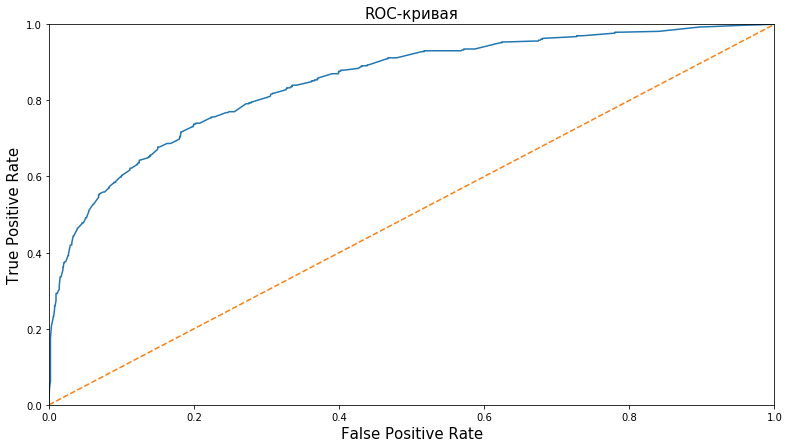

ROC-AUC случайного леса на тестовой выборки: 0.848


In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

probabilities_test = model_forest_down.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

print('')
plt.figure(figsize=(13, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC-кривая', fontsize=15)
plt.show()

auc_roc_forest_test = roc_auc_score(target_test, probabilities_one_test)
print('ROC-AUC случайного леса на тестовой выборки: {:.3f}'.format(auc_roc_forest_test))

По ROC кривой мы можем сказать, что наша модель не случайна.

# 5. Вывод

Чтобы провести исследование, нам было необходимо подготовить данные(разобраться с пропусками, удалить ненужные столбцы и "привести" категориальные признаки к нужному виду), проверить модели с различными параметрами и выявить, какая покажет лучший результат. Также мы рассмотрели различные методы борьбы с дисбалансом классов. 

Мы выяснили, что модель дерева случайного леса справилась лучше всех, а метод для борьбы с дисбалансом уменьшение выборки.

И получили конечные результаты модели: F1 = 0.603 и ROC-AUC = 0.851. Результаты конечно не идеальные и есть куда стремиться.